In [1]:
import pandas as pd
import os

### Merging Data

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data")]

all_months_data= pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv" , index=False)

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


### Data Cleaning

#### Drop rows NaN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')

#### Find 'Or' and delete it

In [5]:
all_data = all_data[all_data['Order Date'].str[:2] != 'Or']

#### Convert columns to correct type

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


# Augment Data with additional columns
    

## Add month Column

In [7]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


### Add Sales Column

In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98


### Add a city Column

In [9]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ', ' + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,"New York City, NY"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,"Dallas, TX"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,"New York City, NY"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,"Dallas, TX"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,"Seattle, WA"


# What was the best month for sales ? How much was Earned that month?

In [10]:
results = all_data.groupby('Month').sum()
results

<ipython-input-10-a5288b5496b3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


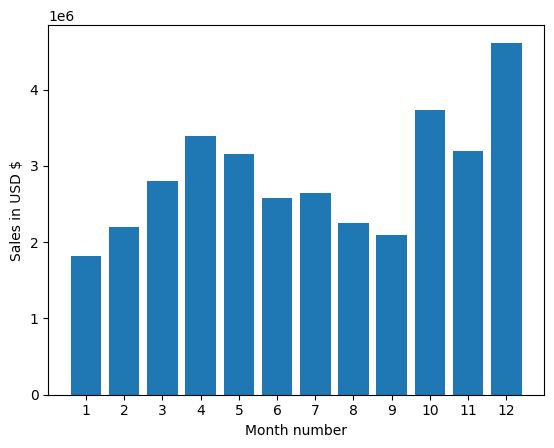

In [11]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD $')
plt.xlabel('Month number')
plt.show()

# What city had the highest number of sales?

In [12]:
results = all_data.groupby('City').sum()
results

<ipython-input-12-7385b3f009b8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Austin, TX",11153,1809873.61,69829,1819581.75
"Boston, MA",22528,3637409.77,141112,3661642.01
"Dallas, TX",16730,2752627.82,104620,2767975.40
"Los Angeles, CA",33289,5421435.23,208325,5452570.80
"New York City, NY",27932,4635370.83,175741,4664317.43
"Portland, ME",2750,447189.25,17144,449758.27
"Portland, OR",11303,1860558.22,70621,1870732.34
"San Francisco, CA",50239,8211461.74,315520,8262203.91


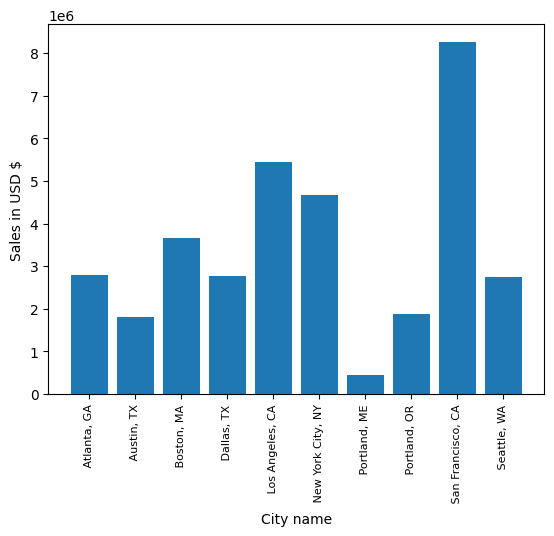

In [13]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD $')
plt.xlabel('City name')
plt.show()

## What time should we display advertisements to maximize Likelihood of customer's buying product?

In [14]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [15]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count']=1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,"New York City, NY",17,14,1
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,"Dallas, TX",14,43,1
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,"New York City, NY",11,36,1
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,"Dallas, TX",20,40,1
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,"Seattle, WA",22,55,1


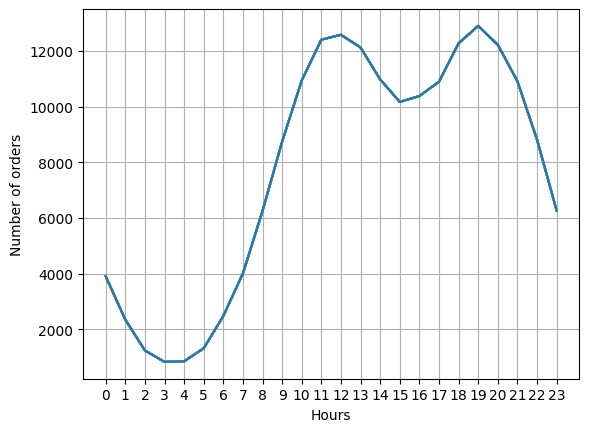

In [20]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

## What products are most often sold together?

In [26]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

<ipython-input-26-7d8ccab84436>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
15,194110,"Google Phone,Wired Headphones"
77,194170,"Google Phone,USB-C Charging Cable"
82,194174,"iPhone,Lightning Charging Cable,Wired Headphones"
89,194179,"Flatscreen TV,AAA Batteries (4-pack)"
103,194192,"Wired Headphones,Bose SoundSport Headphones"


In [32]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## What product sold the most? Why do you think it sold the most?

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,"New York City, NY",17,14,1
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,"Dallas, TX",14,43,1
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,"New York City, NY",11,36,1
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,"Dallas, TX",20,40,1
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,"Seattle, WA",22,55,1


<ipython-input-41-681a818420d5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity = product_group.sum()['Quantity Ordered']


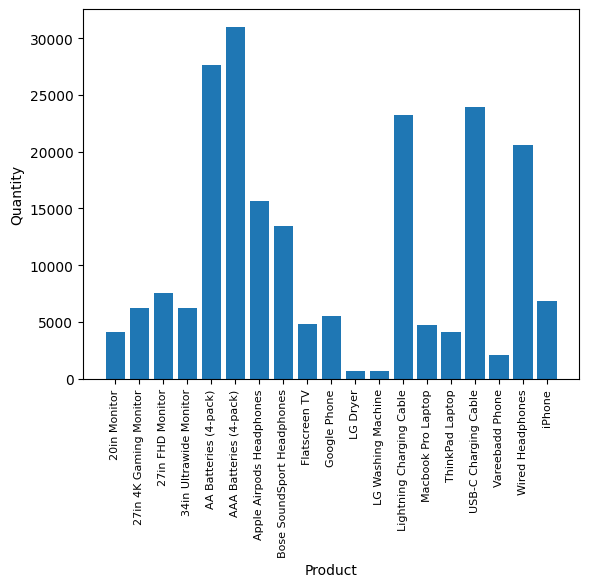

In [41]:
product_group = all_data.groupby ( 'Product')

quantity = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity)

plt. xticks(products, rotation='vertical', size=8)
plt.xlabel("Product")
plt.ylabel("Quantity")
plt.show()

In [45]:
prices = all_data.groupby('Product').mean()['Price Each']

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


<ipython-input-45-3773e24aa02d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']


<ipython-input-48-376f672475bb>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


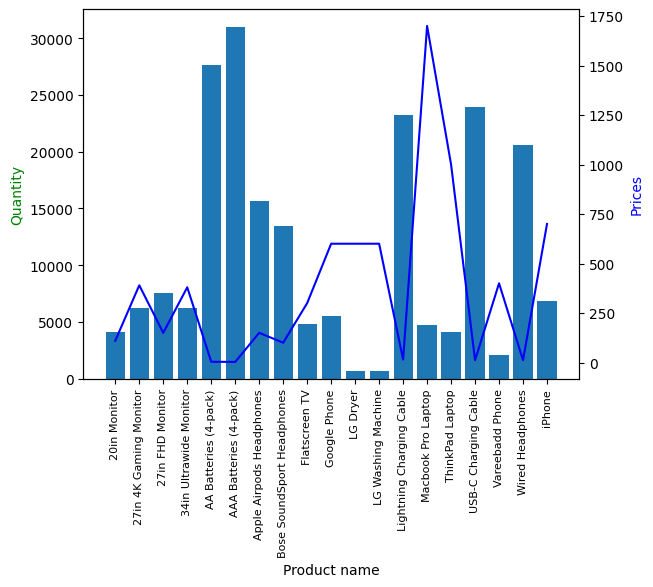

In [48]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity)
ax2.plot(products, prices,'b-')
ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Prices', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()